<a href="https://colab.research.google.com/github/Edward117i/Portafolio-Final_Curso-de-Python-para-Ciencia-de-Datos/blob/main/Portafolio_Final_Curso_de_Python_para_Ciencia_de_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

#Cargar el dataset
file_path = '/content/online_retail.csv'
data = pd.read_csv(file_path)

In [2]:
print(data.info()) # Información básica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [3]:
print(data.head()) # Primeras filas

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [4]:
print(data.describe() ) # Información estadística básica

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
data.isnull().sum() # suma de los valores nulos

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [6]:
data.duplicated().sum() # suma de los valores duplicados

np.int64(5268)

In [10]:
unique_values = {col: data[col].unique() for col in data.columns} # Crear un diccionario con las columnas y sus valores únicos

for col, values in unique_values.items(): # Imprimir los valores únicos de cada columna
    print(f"Columna {col}:")
    print(f'Numero de valores unicos:, {len(values)}')
    print(f'Valores unicos: {values[:10]}')
    print('-' * 50)

Columna InvoiceNo:
Numero de valores unicos:, 25900
Valores unicos: ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna StockCode:
Numero de valores unicos:, 4070
Valores unicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna Description:
Numero de valores unicos:, 4224
Valores unicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna Quantity:
Numero de valores unicos:, 722
Valores unicos: [ 6  8  2 32  3  4 24 12 48 18]
---------------------------------------------

In [11]:
data_cleaned = data.drop_duplicates() # Eliminar duplicados

data_cleaned = data_cleaned.dropna(subset=['CustomerID']) # Eliminar filas con valores nulos en 'CustomerID'

In [13]:
data_cleaned.isnull().sum() # suma de los valores nulos

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [14]:
data_cleaned.duplicated().sum() # suma de los valores duplicados

np.int64(0)

In [15]:
data_cleaned.head() # Primeras filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Importe total

In [16]:
data_cleaned['TotalAlmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']


In [17]:
data_cleaned.head() # Primeras filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAlmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


Formato fecha (Serie de tiempo)

In [18]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate']) # Convertir la columna 'InvoiceDate' a tipo de dato de fecha
data_cleaned.head() # Primeras filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAlmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     401604 non-null  object        
 1   StockCode     401604 non-null  object        
 2   Description   401604 non-null  object        
 3   Quantity      401604 non-null  int64         
 4   InvoiceDate   401604 non-null  datetime64[ns]
 5   UnitPrice     401604 non-null  float64       
 6   CustomerID    401604 non-null  float64       
 7   Country       401604 non-null  object        
 8   TotalAlmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB
None


In [20]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year # Extraer el año de la columna 'InvoiceDate' y crear una nueva columna 'Year'
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month # Extraer el mes de la columna 'InvoiceDate' y crear una nueva columna 'Month'
data_cleaned.head() # Primeras filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAlmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


Venta por año

In [21]:
sales_by_year = data_cleaned.groupby('Year')['TotalAlmount'].sum() # Agrupar por año y sumar los montos totales
print(sales_by_year)

Year
2010     552372.860
2011    7726146.564
Name: TotalAlmount, dtype: float64


Venta por semestre

In [22]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 'Primer semestre' if x <= 6 else 'Segundo semestre') # Crear una nueva columna 'Semester' con los semestres correspondientes

In [23]:
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAlmount'].sum() # Agrupar por año y semestre y sumar los montos totales
print(sales_by_semester)

Year  Semester        
2010  Segundo semestre     552372.860
2011  Primer semestre     3166939.041
      Segundo semestre    4559207.523
Name: TotalAlmount, dtype: float64


Ventas trimestrales del año

In [44]:
data_cleaned['quarterly'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4))) # Crear una nueva columna 'Quarter' con los trimestres correspondientes

In [45]:
sales_by_quarterly = data_cleaned.groupby(['Year', 'Quarter'])['TotalAlmount'].sum() # Agrupar por año y trimestre y sumar los montos totales
print(sales_by_quarterly)

Year  Quarter
2010  4           552372.860
2011  1          1487842.180
      2          1679096.861
      3          2117546.643
      4          2441660.880
Name: TotalAlmount, dtype: float64


Ventas Mensuales del año

In [38]:
sales_by_month_year=data_cleaned.groupby(['Year','Month'])['TotalAlmount'].sum()
print(sales_by_month_year)

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAlmount, dtype: float64


In [47]:
data_cleaned = data_cleaned.drop('Quarter', axis=1) # Eliminar la columna 'Quarter'
data_cleaned.head() # Primeras filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAlmount,Year,Month,Semester,Monthly,quarterly
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,Segundo semestre,Octubre - Diciembre,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Segundo semestre,Octubre - Diciembre,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,Segundo semestre,Octubre - Diciembre,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Segundo semestre,Octubre - Diciembre,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,Segundo semestre,Octubre - Diciembre,4


Ventas por devoluciones

In [50]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0] # Filtrar las ventas con cantidad negativa y contar el número de filas
print(total_returns)

8872


Ventas que no han tenido devoluciones

In [51]:
total_non_returns = data_cleaned[data_cleaned['Quantity'] > 0].shape[0] # Filtrar las ventas con cantidad positiva y contar el número de filas
print(total_non_returns)
#

392732


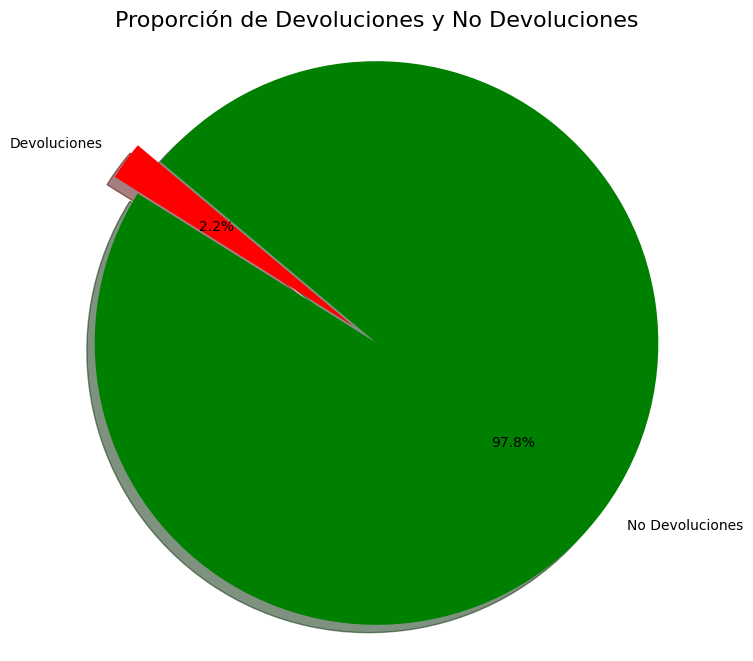

In [52]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No Devoluciones'] # Etiquetas para las categorías
sizes = [total_returns, total_non_returns] # Tamaños de las categorías
colors = ['red', 'green'] # Colores para las categorías
explode = (0.1, 0) # Separación entre las categorías

plt.figure(figsize=(8, 8)) # Crear una figura de 8x8 pulgadas
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) # Graficar el diagrama de pastel

plt.title('Proporción de Devoluciones y No Devoluciones', fontsize=16) # Título del gráfico
plt.axis('equal') # Ajustar el aspecto del gráfico para que sea circular
plt.show() # Mostrar el gráfico

In [55]:
#Crear un columna categorica basada en el monto total de la transaccion (ejemplo: 'Low', 'Medium', 'High')
def categorize_amount(amount):
    if amount < 20:
        return 'Low'
    elif amount < 100:
        return 'Medium'
    else:
        return 'High'

data_cleaned['AmountCategory'] = data_cleaned['TotalAlmount'].apply(categorize_amount)

#Mostrar la cantidad de ventas por categoría
print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAlmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom         15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom         22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom         20.34   

   Year  Month          Semester              Monthly  quarterly  \
0  2010     12  Segundo semest

Graficar por categoria

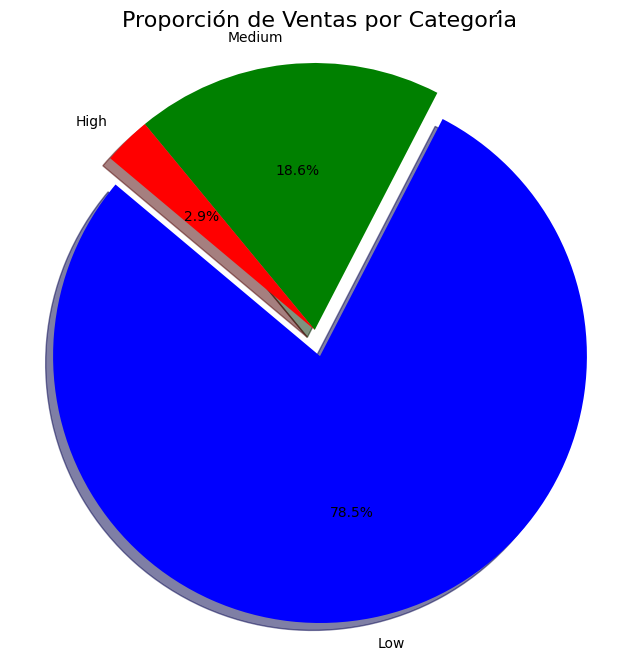

In [56]:
labels = ['Low', 'Medium', 'High'] # Etiquetas para las categorías
colors = ['blue', 'green', 'red'] # Colores para las categorías
explode = (0.1, 0, 0) # Separación entre las categorías

plt.figure(figsize=(8, 8)) # Crear una figura de 8x8 pulgadas
plt.pie(data_cleaned['AmountCategory'].value_counts(), explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140) # Graficar el diagrama de pastel
plt.title('Proporción de Ventas por Categoría', fontsize=16) # Título del gráfico
plt.axis('equal') # Ajustar el aspecto del gráfico para que sea circular
plt.show() # Mostrar el gráfico

Distribucion de ventas por mes y año

<Figure size 1200x600 with 0 Axes>

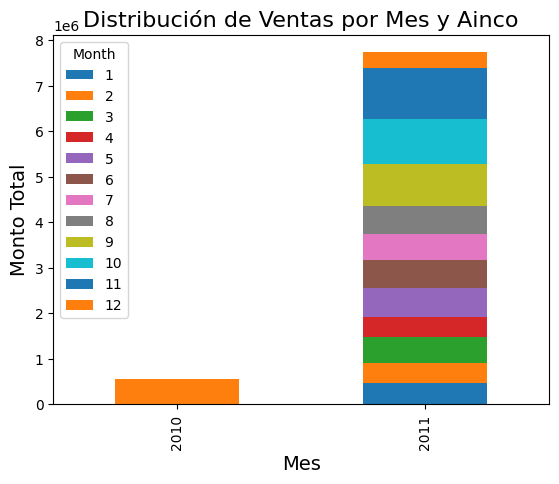

In [57]:
plt.figure(figsize=(12, 6)) # Crear una figura de 12x6 pulgadas
data_cleaned.groupby(['Year', 'Month'])['TotalAlmount'].sum().unstack().plot(kind='bar', stacked=True) # Agrupar por año y mes, sumar los montos totales y graficar un diagrama de barras apiladas
plt.title('Distribución de Ventas por Mes y Ainco', fontsize=16) # Título del gráfico
plt.xlabel('Mes', fontsize=14) # Etiqueta para el eje x
plt.ylabel('Monto Total', fontsize=14) # Etiqueta para el eje y
plt.show() # Mostrar el gráfico

Top 10 de los mas vendidos

In [59]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10) # Agrupar por StockCode, sumar las cantidades y obtener los 10 productos más vendidos
top_products = top_products.reset_index() # Reiniciar el número de fila
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(), on='StockCode', how='left') # Unir los datos de StockCode y Description
#

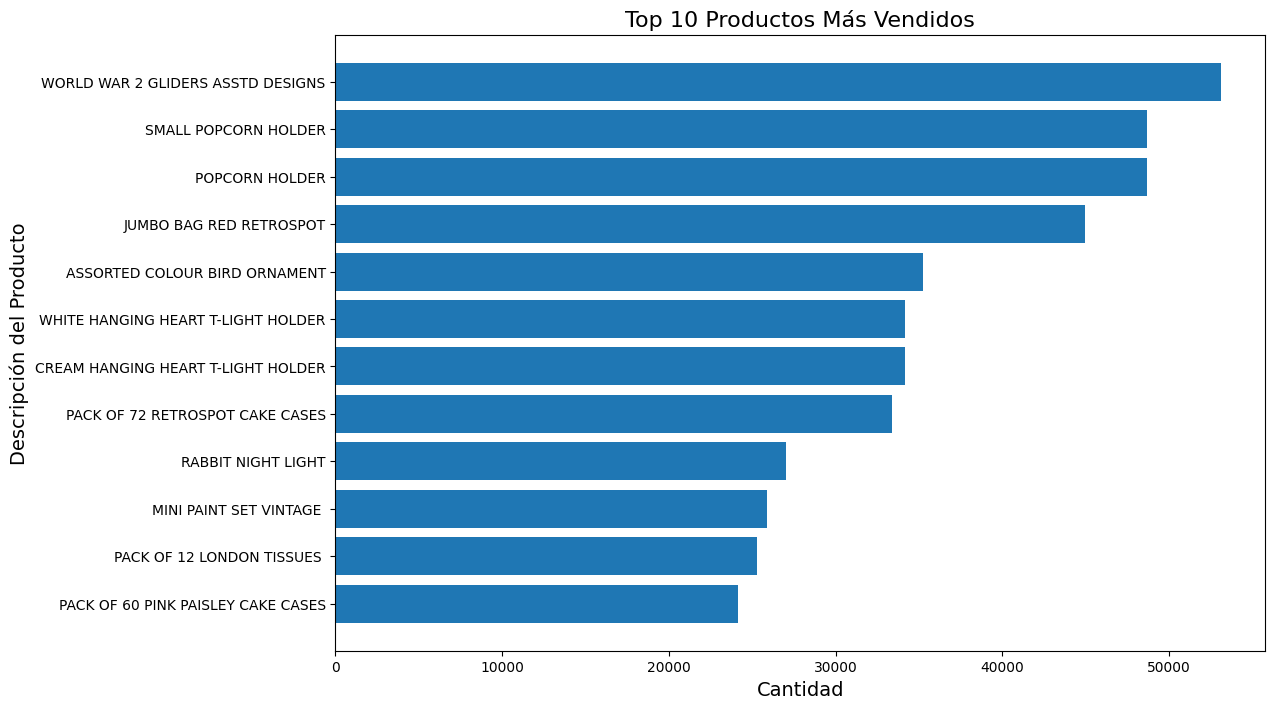

In [61]:
plt.figure(figsize=(12, 8) ) # Crear una figura de 12x8 pulgadas
plt.barh(top_products['Description'], top_products['Quantity']) # Graficar un diagrama de barras horizontal con las descripciones y las cantidades
plt.title('Top 10 Productos Más Vendidos', fontsize=16) # Título del gráfico
plt.xlabel('Cantidad', fontsize=14) # Etiqueta para el eje x
plt.ylabel('Descripción del Producto', fontsize=14) # Etiqueta para el eje y
plt.gca().invert_yaxis() # Invertir el eje y para que la descripción del producto aparezca en orden descendente
plt.show() # Mostrar el gráfico